<div style="
  padding: 18px 24px;
  margin-top: 15px;
  margin-bottom: 25px;
  border-left: 6px solid var(--jp-info-color0);
  background: var(--jp-layout-color2);
  border-radius: 8px;
">
<h1 style="margin:0; color:var(--jp-ui-font-color1);">
03. Data Quality Check & Cleaning
</h1>
<p style="font-size: 1.1em; color: var(--jp-ui-font-color1); margin-top: 6px;">
Проверка качества данных и очистка
</p>
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  /* color: var(--jp-ui-font-color1); */
  margin-top: 32px;
">
03.1 Проверка на дубли
</h2>

In [44]:
# Импорты для всего ноутбука
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from utils import load_raw_df, load_columns_mapping

# Загрузка данных
df = load_raw_df()

# Ключ для поиска дублей - все колонки
key = df.columns.tolist()

# группы с количеством > 1
dup_groups = (
    df.groupby(key)
      .size()
      .reset_index(name='count')
      .query('count > 1')
)
print(f"Найдено дублирующихся групп: {len(dup_groups)}")
display(dup_groups)

# строки, которые считаются дублями (keep=False помечает все копии)
dups = df[df.duplicated(subset=key, keep=False)].sort_values(key)
print(f"Количество строк-дублей: {len(dups)}")


Найдено дублирующихся групп: 9


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,count
5,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight,2
73,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight,2
369,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight,2
370,Female,21.0,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight,4
526,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight,2
678,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight,2
1116,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight,2
1343,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I,15
1459,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight,2


Количество строк-дублей: 33


<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
Есть дублирующиеся строки, уберем их, чтобы они не приводили к дисбалансу
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.2 Проверка на пропущенные значения
</h2>


In [45]:
# Проверка на пропущенные значения
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Пропущено': missing,
    'Процент': missing_pct
}).query('Пропущено > 0')

if len(missing_df) > 0:
    display(Markdown("**⚠️ Найдены пропущенные значения:**"))
    display(missing_df)
else:
    display(Markdown("**✅ Пропущенных значений не обнаружено**"))


**✅ Пропущенных значений не обнаружено**

<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.3 Проверка типов данных
</h2>


In [46]:
# Информация о типах данных
display(Markdown("**Информация о типах данных:**"))
info_df = pd.DataFrame({
    'Тип данных': df.dtypes,
    'Уникальных значений': df.nunique(),
    'Примеры значений': [', '.join(map(str, df[col].unique()[:5])) for col in df.columns]
})
display(info_df)

# Проверка числовых признаков
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

display(Markdown(f"**Числовые признаки ({len(numeric_cols)}):** {', '.join(numeric_cols)}"))
display(Markdown(f"**Категориальные признаки ({len(categorical_cols)}):** {', '.join(categorical_cols)}"))


**Информация о типах данных:**

,Тип данных,Уникальных значений,Примеры значений
Gender,object,2,"Female, Male"
Age,float64,1402,"21.0, 23.0, 27.0, 22.0, 29.0"
Height,float64,1574,"1.62, 1.52, 1.8, 1.78, 1.5"
Weight,float64,1525,"64.0, 56.0, 77.0, 87.0, 89.8"
family_history_with_overweight,object,2,"yes, no"
FAVC,object,2,"no, yes"
FCVC,float64,810,"2.0, 3.0, 1.0, 2.450218, 2.880161"
NCP,float64,635,"3.0, 1.0, 4.0, 3.28926, 3.995147"
CAEC,object,4,"Sometimes, Frequently, Always, no"
SMOKE,object,2,"no, yes"


**Числовые признаки (8):** Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE

**Категориальные признаки (9):** Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad

<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.4 Проверка на некорректные значения
</h2>


In [47]:
issues = []

# Проверка возраста (должен быть положительным и разумным)
if 'Age' in df.columns:
    age_issues = df[(df['Age'] < 0) | (df['Age'] > 120)]
    if len(age_issues) > 0:
        issues.append(f"Возраст: {len(age_issues)} некорректных значений (отрицательные или > 120)")
        display(Markdown(f"**⚠️ Некорректные значения возраста:** {len(age_issues)} строк"))
        display(age_issues[['Age']].head(10))

# Проверка роста (должен быть положительным, обычно 0.5-2.5 метра)
if 'Height' in df.columns:
    height_issues = df[(df['Height'] <= 0) | (df['Height'] > 3)]
    if len(height_issues) > 0:
        issues.append(f"Рост: {len(height_issues)} некорректных значений (<= 0 или > 3 м)")
        display(Markdown(f"**⚠️ Некорректные значения роста:** {len(height_issues)} строк"))
        display(height_issues[['Height']].head(10))

# Проверка веса (должен быть положительным, обычно 20-300 кг)
if 'Weight' in df.columns:
    weight_issues = df[(df['Weight'] <= 0) | (df['Weight'] > 500)]
    if len(weight_issues) > 0:
        issues.append(f"Вес: {len(weight_issues)} некорректных значений (<= 0 или > 500 кг)")
        display(Markdown(f"**⚠️ Некорректные значения веса:** {len(weight_issues)} строк"))
        display(weight_issues[['Weight']].head(10))

if len(issues) == 0:
    display(Markdown("**✅ Некорректных значений в числовых признаках не обнаружено**"))


**✅ Некорректных значений в числовых признаках не обнаружено**

<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.5 Проверка на выбросы (outliers)
</h2>


**Выбросы (метод IQR, границы: Q1-1.5*IQR, Q3+1.5*IQR):**

,Количество выбросов,Процент,Нижняя граница,Верхняя граница
Age,168.0,7.96,10.87,35.08
Height,1.0,0.05,1.42,1.98
Weight,1.0,0.05,2.54,170.37


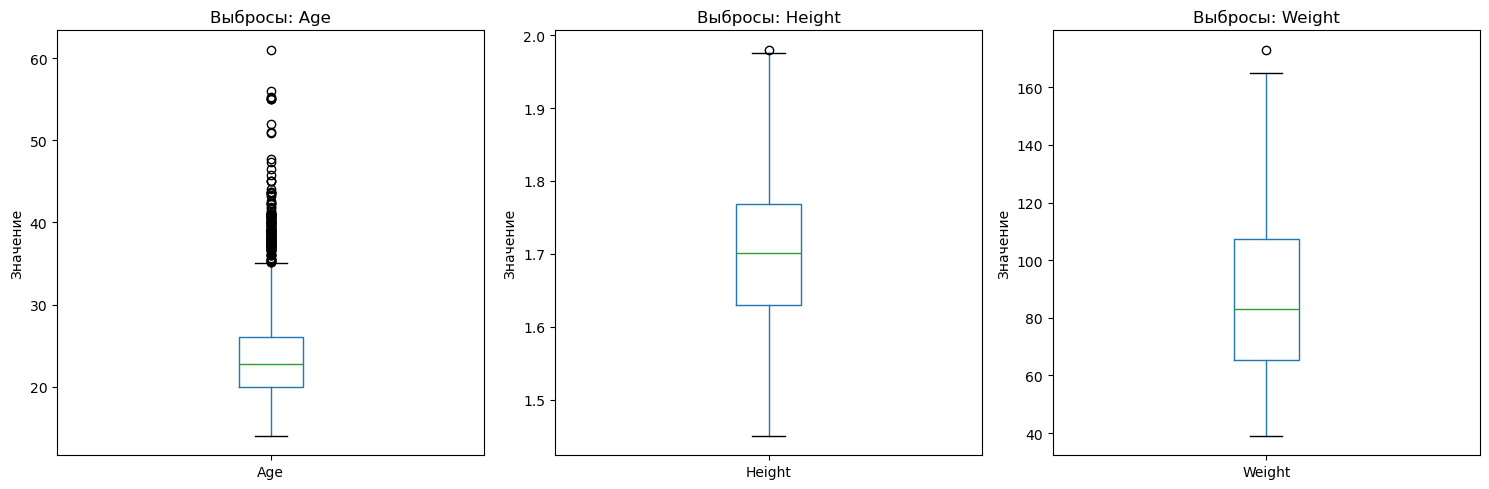

In [48]:
# Проверка выбросов для числовых признаков методом IQR
numeric_cols = ['Age', 'Height', 'Weight']
outliers_summary = {}

for col in numeric_cols:
    if col not in df.columns:
        continue
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col] = {
        'count': len(outliers),
        'percentage': len(outliers) / len(df) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

if outliers_summary:
    outliers_df = pd.DataFrame(outliers_summary).T
    outliers_df.columns = ['Количество выбросов', 'Процент', 'Нижняя граница', 'Верхняя граница']
    display(Markdown("**Выбросы (метод IQR, границы: Q1-1.5*IQR, Q3+1.5*IQR):**"))
    display(outliers_df.round(2))
    
    # Визуализация выбросов
    fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5*len(numeric_cols), 5))
    if len(numeric_cols) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, numeric_cols):
        if col not in df.columns:
            continue
        df.boxplot(column=col, ax=ax, grid=False)
        ax.set_title(f'Выбросы: {col}')
        ax.set_ylabel('Значение')
    
    plt.tight_layout()
    plt.show()


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.6 Распределение NObeyesdad по полу
</h2>


**Распределение NObeyesdad по полу (абсолютные значения):**

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,All
Gender,,,,,,,,
Female,173,141,156,2,323,145,103,1043
Male,99,146,195,295,1,145,187,1068
All,272,287,351,297,324,290,290,2111


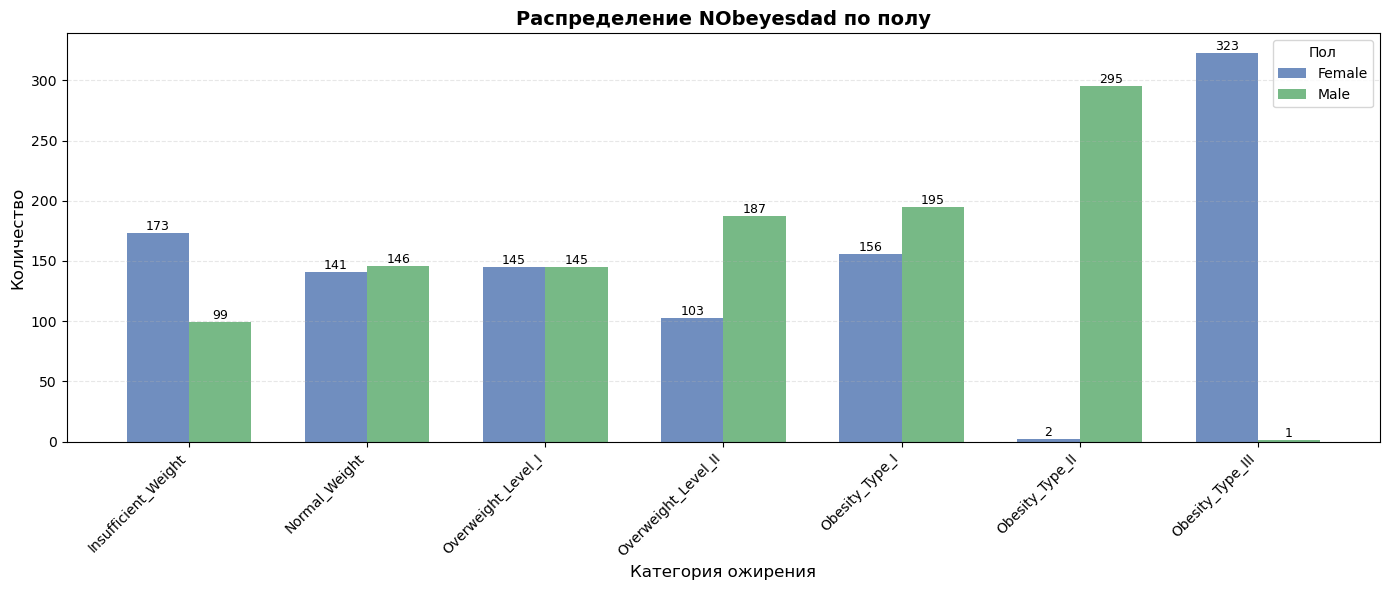

In [49]:
# Проверка распределения целевой переменной по полу
if all(col in df.columns for col in ['Gender', 'NObeyesdad']):
    # Создаем сводную таблицу
    crosstab = pd.crosstab(df['Gender'], df['NObeyesdad'], margins=True)
    
    display(Markdown("**Распределение NObeyesdad по полу (абсолютные значения):**"))
    display(crosstab)
    
    # Парная столбчатая диаграмма (grouped bar chart)
    # Подготовка данных для визуализации
    crosstab_vis = pd.crosstab(df['Gender'], df['NObeyesdad'])
    
    # Порядок категорий ожирения
    obesity_order = [
        'Insufficient_Weight',
        'Normal_Weight', 
        'Overweight_Level_I',
        'Overweight_Level_II',
        'Obesity_Type_I',
        'Obesity_Type_II',
        'Obesity_Type_III'
    ]
    
    # Упорядочиваем колонки
    available_cols = [col for col in obesity_order if col in crosstab_vis.columns]
    crosstab_vis = crosstab_vis[available_cols]
    
    # Создаем парную столбчатую диаграмму
    fig, ax = plt.subplots(figsize=(14, 6))
    
    x = np.arange(len(crosstab_vis.columns))
    width = 0.35
    
    genders = crosstab_vis.index.tolist()
    colors = ['#4C72B0', '#55A868']  # Синий и зеленый
    
    for i, gender in enumerate(genders):
        offset = (i - len(genders)/2 + 0.5) * width
        bars = ax.bar(x + offset, crosstab_vis.loc[gender], width, 
                      label=gender, color=colors[i % len(colors)], alpha=0.8)
        
        # Добавляем значения на столбцы
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}',
                       ha='center', va='bottom', fontsize=9)
    
    ax.set_xlabel('Категория ожирения', fontsize=12)
    ax.set_ylabel('Количество', fontsize=12)
    ax.set_title('Распределение NObeyesdad по полу', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(crosstab_vis.columns, rotation=45, ha='right')
    ax.legend(title='Пол', fontsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()
else:
    display(Markdown("**⚠️ Не найдены колонки Gender или NObeyesdad**"))


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.9 Статистическая сводка
</h2>


**Основная информация о датасете:**

- Размер датасета: 2111 строк, 17 столбцов

- Память: 1.29 MB

**Статистика по числовым признакам:**

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


**Распределение целевой переменной:**

,Количество,Процент
NObeyesdad,,
Insufficient_Weight,272,12.88
Normal_Weight,287,13.60
Obesity_Type_I,351,16.63
Obesity_Type_II,297,14.07
Obesity_Type_III,324,15.35
Overweight_Level_I,290,13.74
Overweight_Level_II,290,13.74


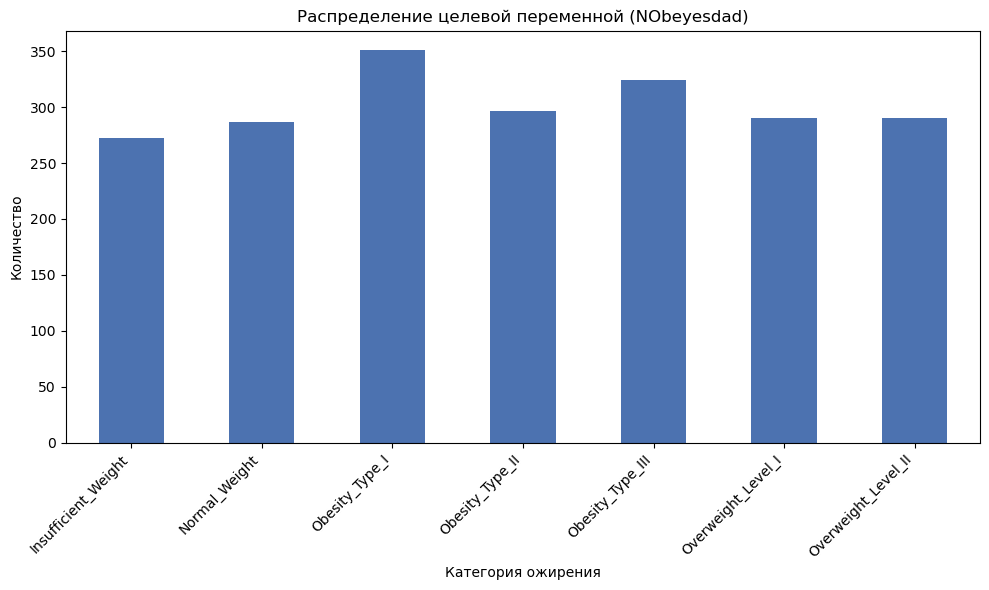

In [50]:
display(Markdown("**Основная информация о датасете:**"))
display(Markdown(f"- Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов"))
display(Markdown(f"- Память: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB"))

display(Markdown("**Статистика по числовым признакам:**"))
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    display(df[numeric_cols].describe().round(2))

display(Markdown("**Распределение целевой переменной:**"))
if 'NObeyesdad' in df.columns:
    target_dist = df['NObeyesdad'].value_counts().sort_index()
    target_dist_pct = (df['NObeyesdad'].value_counts(normalize=True) * 100).sort_index().round(2)
    target_summary = pd.DataFrame({
        'Количество': target_dist,
        'Процент': target_dist_pct
    })
    display(target_summary)
    
    # Визуализация распределения целевой переменной
    plt.figure(figsize=(10, 6))
    target_dist.plot(kind='bar', color='#4C72B0')
    plt.title('Распределение целевой переменной (NObeyesdad)')
    plt.xlabel('Категория ожирения')
    plt.ylabel('Количество')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.7 Проверка согласованности данных (BMI)
</h2>


**⚠️ Найдено 25 несоответствий между рассчитанным BMI и нормализованной категорией ожирения:**

,Height,Weight,BMI_calculated,NObeyesdad,NObeyesdad_norm
19,1.793926,59.682591,18.545503,Insufficient_Weight,Insufficient_Weight
31,1.699568,54.987740,19.036573,Insufficient_Weight,Insufficient_Weight
103,1.610863,49.516027,19.082206,Insufficient_Weight,Insufficient_Weight
125,1.550648,44.641796,18.565866,Insufficient_Weight,Insufficient_Weight
328,1.560000,45.000000,18.491124,Normal_Weight,Normal_Weight
502,1.740000,56.000000,18.496499,Normal_Weight,Normal_Weight
512,1.560000,45.000000,18.491124,Normal_Weight,Normal_Weight
585,1.535618,57.259124,24.281657,Overweight_Level_I,Overweight
612,1.849425,85.228116,24.917785,Overweight_Level_I,Overweight
656,1.616533,65.062945,24.898006,Overweight_Level_I,Overweight


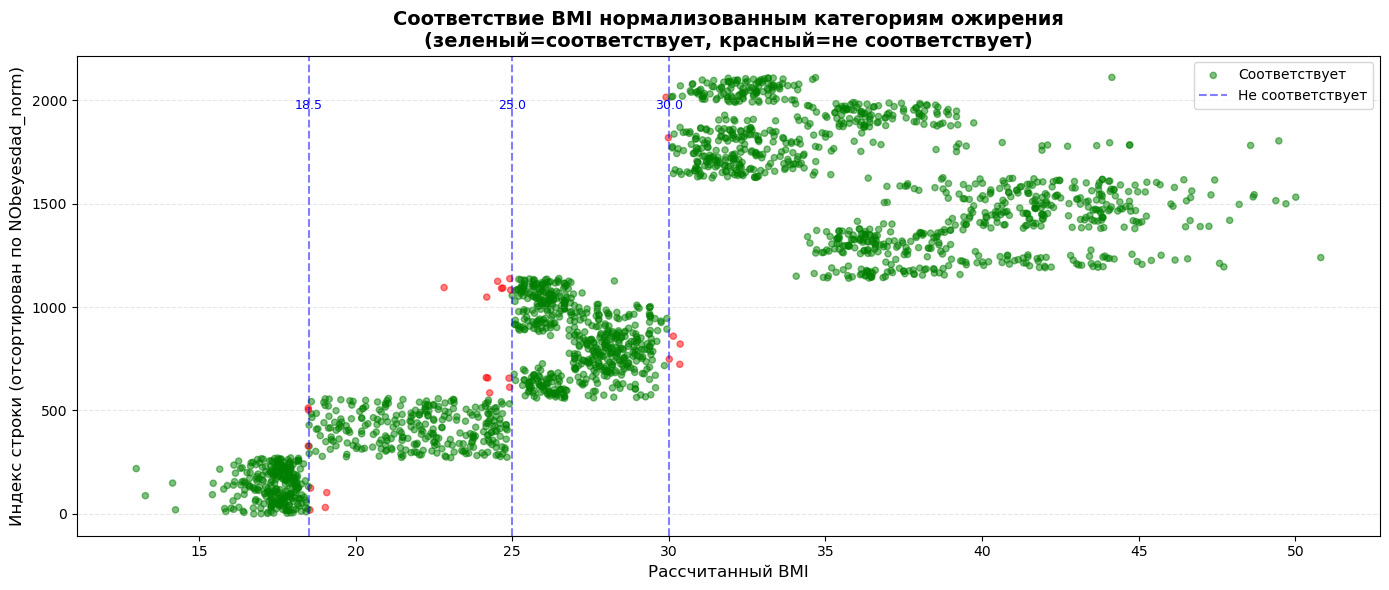

**Статистика несоответствий по нормализованным категориям:**

/var/folders/dw/d15l4g8x2bz2syn5f_y3_qkm0000gn/T/ipykernel_80668/2104021181.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mismatch_stats = mismatches.groupby('NObeyesdad_norm').size().reindex(ordered_categories, fill_value=0)


,Количество несоответствий
NObeyesdad_norm,
Insufficient_Weight,4
Normal_Weight,3
Overweight,16
Obesity,2


In [51]:
# Расчет BMI и проверка соответствия категориям ожирения на основе NObeyesdad_norm
if all(col in df.columns for col in ['Height', 'Weight', 'NObeyesdad']):
    # Загружаем конфигурацию нормализованных категорий
    columns_mapping = load_columns_mapping()
    nobeyesdad_norm = columns_mapping.get('NObeyesdad_norm', {})

    if not nobeyesdad_norm:
        display(Markdown("**⚠️ Конфигурация NObeyesdad_norm не найдена в columns_mapping.yml**"))
    else:
        df_check = df.copy()
        df_check['BMI_calculated'] = df_check['Weight'] / (df_check['Height'] ** 2)

        # Получаем маппинг и категории из конфигурации
        mapping = nobeyesdad_norm.get('mapping', {})
        categories = nobeyesdad_norm.get('categories', {})
        category_order = nobeyesdad_norm.get('order', [])

        # Создаем словарь диапазонов BMI для нормализованных категорий
        bmi_ranges = {}
        for norm_category, category_info in categories.items():
            bmi_min = category_info.get('bmi_min', 0)
            bmi_max = category_info.get('bmi_max')
            if bmi_max is None:
                bmi_max = float('inf')
            bmi_ranges[norm_category] = (bmi_min, bmi_max)

        # Функция для проверки соответствия BMI нормализованной категории
        def check_bmi_category_norm(bmi, original_category):
            # Применяем маппинг к исходной категории
            norm_category = mapping.get(original_category, original_category)

            if norm_category not in bmi_ranges:
                return None, norm_category

            lower, upper = bmi_ranges[norm_category]
            if upper == float('inf'):
                match = bmi >= lower
            else:
                match = lower <= bmi < upper

            return match, norm_category

        # Применяем проверку
        results = df_check.apply(
            lambda row: check_bmi_category_norm(row['BMI_calculated'], row['NObeyesdad']), 
            axis=1
        )
        df_check['BMI_match'] = [r[0] for r in results]
        df_check['NObeyesdad_norm'] = [r[1] for r in results]

        # Упорядочиваем категории и сортируем строки, чтобы ось Y следовала порядку целевой переменной
        extra_categories = [cat for cat in pd.unique(df_check['NObeyesdad_norm']) if cat not in category_order]
        ordered_categories = category_order + extra_categories
        df_check['NObeyesdad_norm'] = pd.Categorical(
            df_check['NObeyesdad_norm'],
            categories=ordered_categories,
            ordered=True
        )
        df_check = df_check.sort_values('NObeyesdad_norm').reset_index(drop=True)
        ordered_categories = list(df_check['NObeyesdad_norm'].cat.categories)

        mismatches = df_check[df_check['BMI_match'] == False]

        if len(mismatches) > 0:
            display(Markdown(f"**⚠️ Найдено {len(mismatches)} несоответствий между рассчитанным BMI и нормализованной категорией ожирения:**"))
            display(mismatches[['Height', 'Weight', 'BMI_calculated', 'NObeyesdad', 'NObeyesdad_norm']].head(10))

            # Визуализация несоответствий
            plt.figure(figsize=(14, 6))
            plt.scatter(df_check['BMI_calculated'], range(len(df_check)), 
                       c=df_check['BMI_match'].map({True: 'green', False: 'red'}),
                       alpha=0.5, s=20)
            plt.xlabel('Рассчитанный BMI', fontsize=12)
            plt.ylabel('Индекс строки (отсортирован по NObeyesdad_norm)', fontsize=12)
            plt.title('Соответствие BMI нормализованным категориям ожирения\n(зеленый=соответствует, красный=не соответствует)', 
                     fontsize=14, fontweight='bold')

            # Добавляем вертикальные линии для границ категорий
            boundary_lines = [18.5, 25.0, 30.0]
            boundary_labels = ['18.5', '25.0', '30.0']
            for bmi_val, label in zip(boundary_lines, boundary_labels):
                plt.axvline(x=bmi_val, color='blue', linestyle='--', alpha=0.5)
                plt.text(bmi_val, len(df_check) * 0.95, label, 
                        ha='center', va='top', fontsize=9, color='blue')

            plt.legend(['Соответствует', 'Не соответствует'], loc='upper right')
            plt.grid(axis='y', alpha=0.3, linestyle='--')
            plt.tight_layout()
            plt.show()

            # Статистика по нормализованным категориям
            display(Markdown("**Статистика несоответствий по нормализованным категориям:**"))
            mismatch_stats = mismatches.groupby('NObeyesdad_norm').size().reindex(ordered_categories, fill_value=0)
            display(mismatch_stats.to_frame(name='Количество несоответствий'))
        else:
            display(Markdown("**✅ Все значения BMI соответствуют нормализованным категориям ожирения**"))

            # Показываем распределение по нормализованным категориям
            display(Markdown("**Распределение по нормализованным категориям:**"))
            norm_dist = df_check['NObeyesdad_norm'].value_counts().reindex(ordered_categories, fill_value=0)
            display(norm_dist.to_frame(name='Количество'))


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
03.10 Итоговая сводка и очистка данных
</h2>


In [52]:
# Загружаем данные заново для очистки
df_clean = load_raw_df()

# Применяем очистку
initial_count = len(df_clean)

# 1. Удаление дублей
df_clean = df_clean.drop_duplicates()
duplicates_removed = initial_count - len(df_clean)

# 2. Удаление строк с некорректными значениями (если есть)
if 'Age' in df_clean.columns:
    df_clean = df_clean[(df_clean['Age'] >= 0) & (df_clean['Age'] <= 120)]
if 'Height' in df_clean.columns:
    df_clean = df_clean[(df_clean['Height'] > 0) & (df_clean['Height'] <= 3)]
if 'Weight' in df_clean.columns:
    df_clean = df_clean[(df_clean['Weight'] > 0) & (df_clean['Weight'] <= 500)]

# Сброс индекса
df_clean = df_clean.reset_index(drop=True)
final_count = len(df_clean)

# Итоговая сводка
display(Markdown("**📊 Итоговая сводка очистки данных:**"))
summary = pd.DataFrame({
    'Метрика': [
        'Исходное количество строк',
        'Удалено дублей',
        'Удалено некорректных значений',
        'Итоговое количество строк',
        'Процент сохраненных данных'
    ],
    'Значение': [
        initial_count,
        duplicates_removed,
        initial_count - duplicates_removed - final_count,
        final_count,
        f"{(final_count / initial_count * 100):.2f}%"
    ]
})
display(summary)

display(Markdown(f"**✅ Очищенный датасет содержит {final_count} строк и готов к дальнейшему анализу**"))
display(Markdown("*Примечание: функция `load_clean_df()` из utils.py автоматически применяет удаление дублей*"))


**📊 Итоговая сводка очистки данных:**

,Метрика,Значение
0,Исходное количество строк,2111
1,Удалено дублей,24
2,Удалено некорректных значений,0
3,Итоговое количество строк,2087
4,Процент сохраненных данных,98.86%


**✅ Очищенный датасет содержит 2087 строк и готов к дальнейшему анализу**

*Примечание: функция `load_clean_df()` из utils.py автоматически применяет удаление дублей*